# **Path Finder**

A classification project designed to predict field of career for students using a dataset from Kaggle, which includes academic performance, experience, and skills. 

**Goal : Predicting a suitable field for student**

## Problem and Task Understanding

Since the output of this project is displaying a suitable field of career for students and there are numerous of fields, this project belongs to the multi-classification. For this project, F1-score will be used for the evaluation metrics as it makes the observation of the model easier, such as the distribution of the data or some anomalies. The higher the F1-score, the better the model is. By the end of this model training, the expected performance is 75%.

# Setup

In this phase, some necessary libraries will be imported and the dataset is loaded and observed. By the end of this phase, it is hoped that there are some insights that can be gathered to guide the preprocessing and analysis phases effectively.

In [372]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [373]:
# Load Dataset
url = 'career_path_in_all_field.csv'
raw_df = pd.read_csv(url)
raw_df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,Engineering,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1
1,Chemistry,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1
2,Engineering,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1
3,Physics,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0
4,Law,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0


In [374]:
# Dataset Description
raw_df.describe()

,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.740375,4.514556,0.999778,2.009556,0.509778,4.500333,0.506556,2.010111,1.987444,2.011111,2.009556,2.005111,1.984111,1.989444,0.497667
std,0.719551,2.866867,0.816950,1.422330,0.499932,2.877968,0.499985,1.418062,1.411129,1.411260,1.411979,1.418441,1.419497,1.411539,0.500022
min,2.500093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.105267,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,3.739713,5.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,4.361090,7.000000,2.000000,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.999803,9.000000,2.000000,4.000000,1.000000,9.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [375]:
# Dataset Info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field                       9000 non-null   object 
 1   Career                      9000 non-null   object 
 2   GPA                         9000 non-null   float64
 3   Extracurricular_Activities  9000 non-null   int64  
 4   Internships                 9000 non-null   int64  
 5   Projects                    9000 non-null   int64  
 6   Leadership_Positions        9000 non-null   int64  
 7   Field_Specific_Courses      9000 non-null   int64  
 8   Research_Experience         9000 non-null   int64  
 9   Coding_Skills               9000 non-null   int64  
 10  Communication_Skills        9000 non-null   int64  
 11  Problem_Solving_Skills      9000 non-null   int64  
 12  Teamwork_Skills             9000 non-null   int64  
 13  Analytical_Skills           9000 

Based on the information of the dataset, there are 9000 entries along with 17 features, all of which contain no missing value yet encompassing various data types, such as object, integer, and float. Therefore, it is ready to proceed to the next phase.

# Data Preprocessing

After observing the data, this phase aims to clean, preprocess, and organize the data for analysis. Hopefully, the dataset is ready to be used for training the model later after going through this phase.

In [376]:
# Copy a Dataset
df = raw_df.copy()

In [377]:
# Check Duplicate
duplicated = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated}")

Number of duplicate rows: 0


In [378]:
# Split the Data Types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

## Univariate Data Visualization

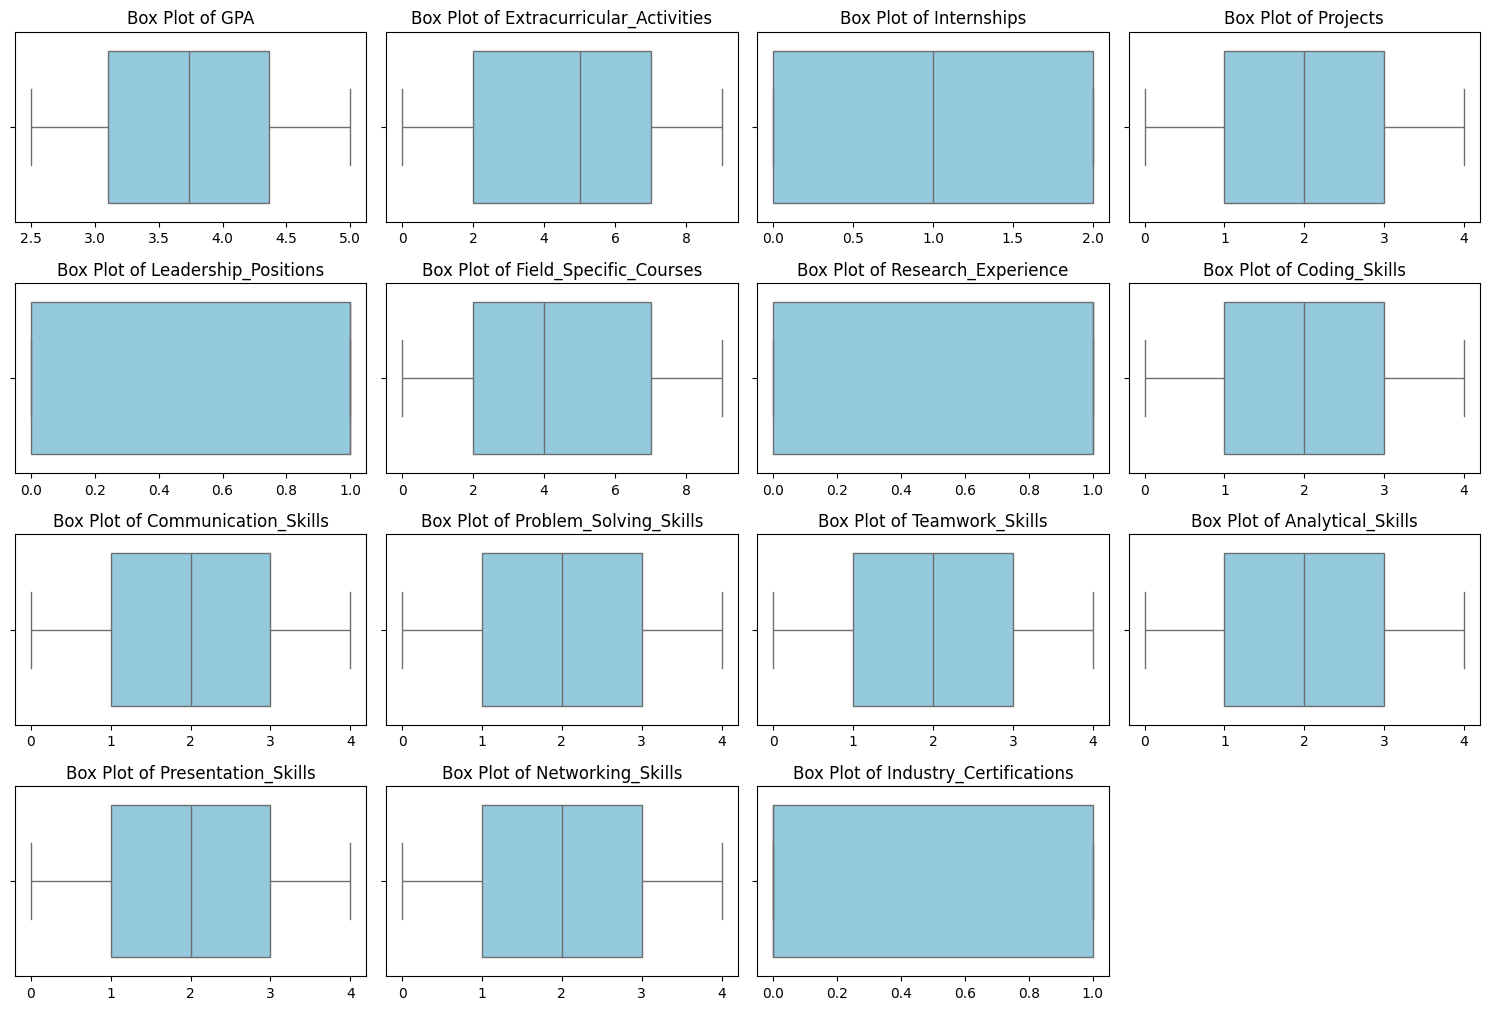

In [379]:
# Univariate for Numerical Features
fig, axes = plt.subplots(nrows=len(numerical_features) // 3 + 1, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

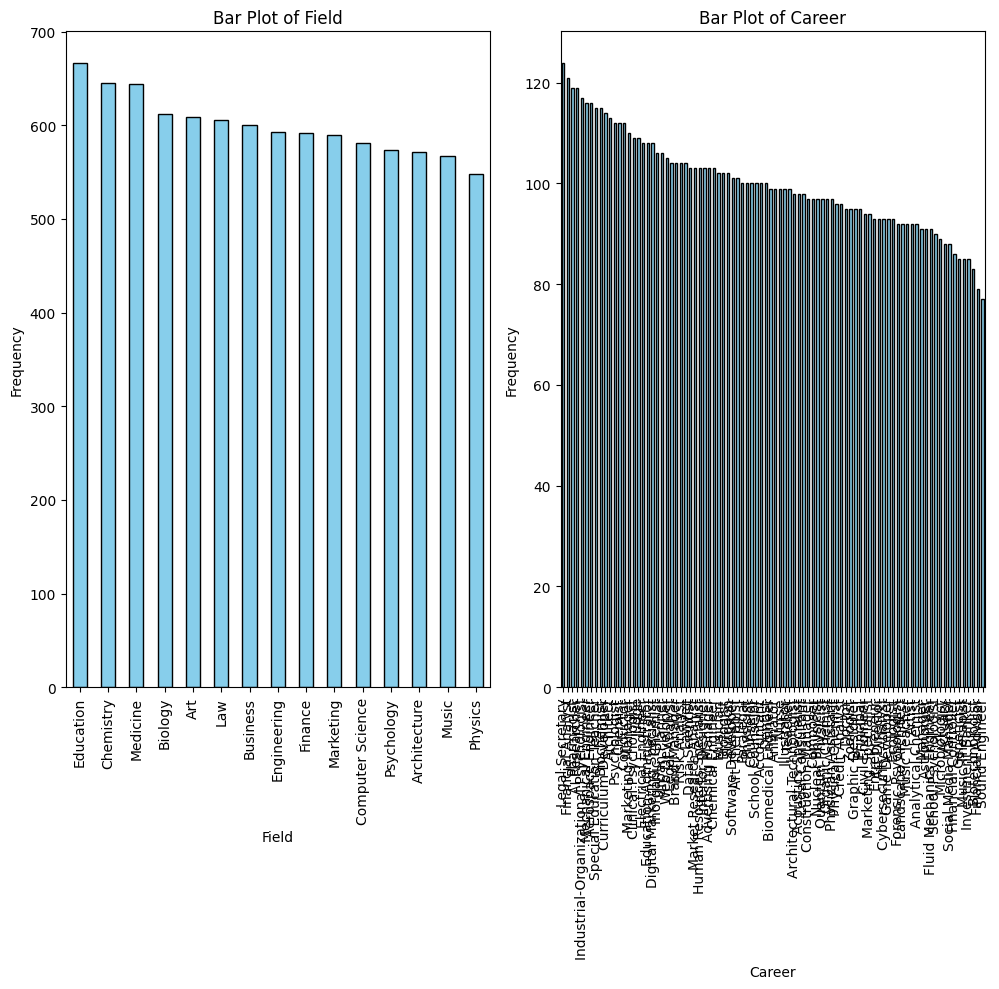

In [380]:
# Univariate for Categorical Features
fig, axes = plt.subplots(nrows=len(categorical_features) // 3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [381]:
# Check the Unique Value of Career Column
print(f"Number of unique value of career features are {df['Career'].unique().size}")

Number of unique value of career features are 90


In [382]:
# Import Library
from sklearn.model_selection import train_test_split

## Feature Engineering

In [383]:
# Merge Related Field
df['Field'] = df['Field'].replace({'Art': 'Art & Music', 'Music': 'Art & Music', 
                                'Medicine' : 'Health Sciences', 'Psychology' : 'Health Sciences',
                                'Biology' : 'Natural Sciences', 'Chemistry' : 'Natural Sciences', 'Physics' : 'Natural Sciences',
                                'Business' : 'Business and Management', 'Finance' : 'Business and Management', 'Marketing' : 'Business and Management'})

## Encoding

In [384]:
# Import Library
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [385]:
# Encode Field
label_encoder = LabelEncoder()
df['Field'] = label_encoder.fit_transform(df['Field'])
df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,5,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1
1,8,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1
2,5,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1
3,8,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0
4,7,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0


In [386]:
# # Target Encoding for Career\n
# def target_encode(train_series, target, min_samples_leaf=1, smoothing=1):
#     '''    
#     Perform target encoding with smoothing.
#     '''
#     # Compute target mean
#     averages = target.groupby(train_series).agg(['mean', 'count'])
#     smoothing_factor = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
#     prior = target.mean()
#     # Smoothing
#     averages['mean'] = prior * (1 - smoothing_factor) + averages['mean'] * smoothing_factor
#     return averages['mean']

#     # Apply target encoding with K-Fold to prevent leakage
# def kfold_target_encoding(df, n_splits=5, random_state=42):
#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#     df['Career_Encoded'] = 0
#     for train_idx, val_idx in kf.split(df):
#         train, val = df.iloc[train_idx], df.iloc[val_idx]
#         means = target_encode(train['Career'], train['Field'])
#         df.loc[val_idx, 'Career_Encoded'] = val['Career'].map(means)
#     return df
    
# df = kfold_target_encoding(df)
# df.head()

In [387]:
# Drop Career Column
df = df.drop(columns='Career')

In [388]:
# Description after Encoding
df.describe()

,Field,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.234000,3.740375,4.514556,0.999778,2.009556,0.509778,4.500333,0.506556,2.010111,1.987444,2.011111,2.009556,2.005111,1.984111,1.989444,0.497667
std,2.723531,0.719551,2.866867,0.816950,1.422330,0.499932,2.877968,0.499985,1.418062,1.411129,1.411260,1.411979,1.418441,1.419497,1.411539,0.500022
min,0.000000,2.500093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.105267,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,3.739713,5.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,7.000000,4.361090,7.000000,2.000000,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,8.000000,4.999803,9.000000,2.000000,4.000000,1.000000,9.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


## Multivariate Data Visualization

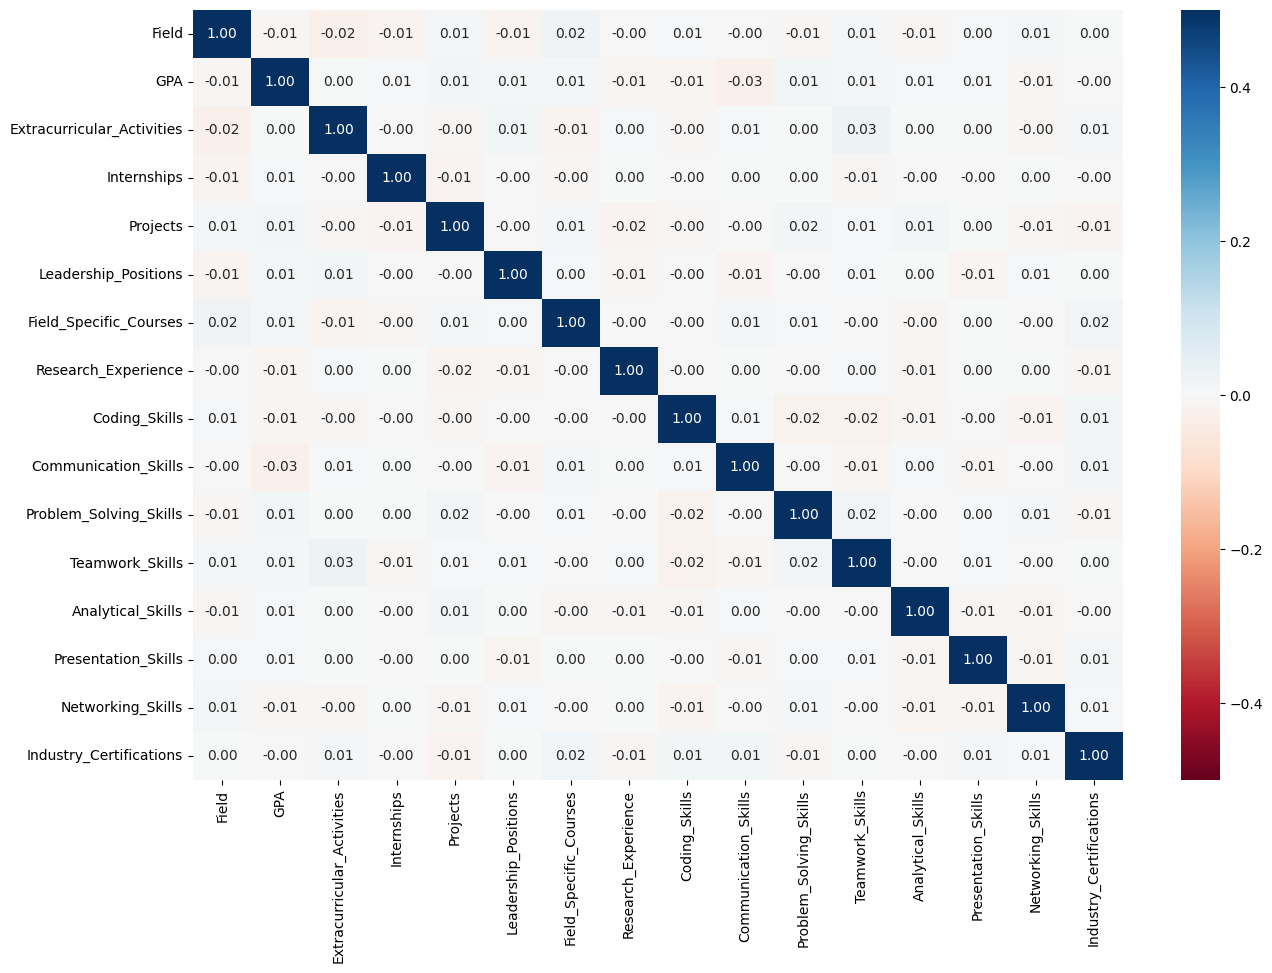

In [389]:
# Multivariate by Heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), vmax=0.5, vmin=-0.5, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

<Axes: ylabel='Density'>

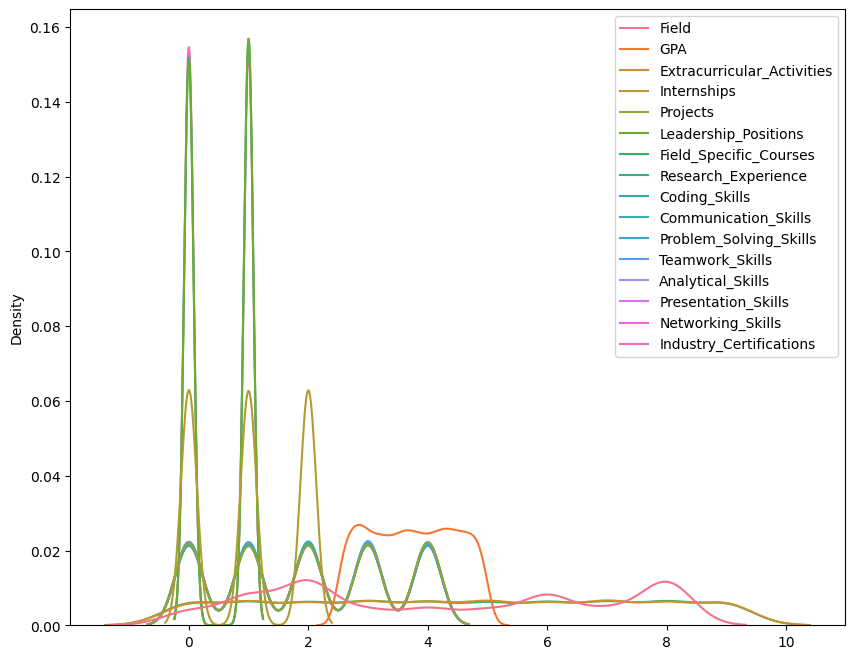

In [390]:
# Visualize the Dispersion of the Features
plt.figure(figsize=(10, 8))
sns.kdeplot(df)

## Standardization

In [391]:
# Assign Independence and Target Feature
X, y = df.loc[:, df.columns != 'Field'], df.loc[:, 'Field']

In [392]:
# Import Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,0.412186,0.555556,0.0,0.50,0.0,0.333333,1.0,1.00,1.00,0.50,0.50,0.25,0.00,0.25,1.0
1,0.607332,0.111111,1.0,0.00,0.0,0.888889,1.0,0.75,1.00,0.00,0.75,0.00,0.75,0.00,1.0
2,0.854755,0.111111,0.0,0.00,0.0,0.555556,0.0,0.25,0.25,0.25,0.50,0.50,0.75,1.00,1.0
3,0.621112,0.333333,0.5,0.75,0.0,0.111111,0.0,1.00,0.25,0.75,0.25,0.50,0.25,0.50,0.0
4,0.934011,0.000000,1.0,1.00,0.0,0.000000,0.0,1.00,1.00,0.75,1.00,1.00,0.75,0.50,0.0


<Axes: ylabel='Density'>

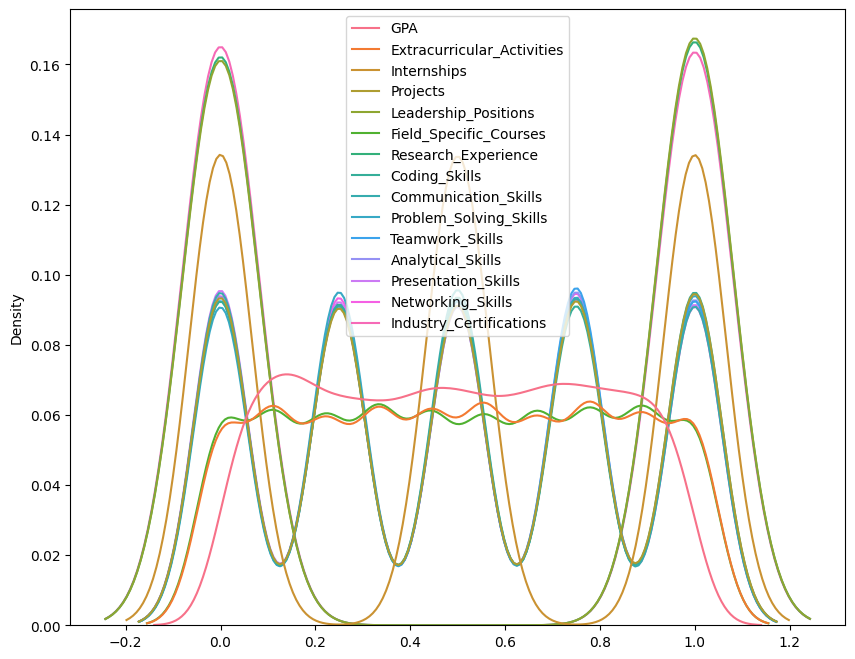

In [393]:
# Visualize the Scaled Dispersion
plt.figure(figsize=(10, 8))
sns.kdeplot(X_scaled)

# Model Benchmarking

Next, the preprocessed data will be fitted with the model. Because there are numerous classification models, the model benchmarking is necessary to find the suitable model for this project. This phase will limit the number of the models to 5 that consist of
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest
4. Super Vector Machine
5. Gradient Boost Machine

In [394]:
# Import Library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [396]:
y.value_counts()

Field
8    1805
2    1782
6    1218
1    1176
4     667
7     606
5     593
3     581
0     572
Name: count, dtype: int64

## Baseline

In [397]:
# Initialize Model
models = {
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbor" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "Gradient Boost Machine" : GradientBoostingClassifier()
}

results = []

In [398]:
# Cross Validation
cv_results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1_weighted")
    cv_results[model_name] = cv_scores
    print(f"{model_name} Cross-Validation Results: {cv_scores}")
    print(f"Mean CV F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Cross-Validation Results: [0.11136815 0.11848991 0.11705314 0.11199289 0.11025798]
Mean CV F1-Score: 0.1138 ± 0.0033
K-Nearest Neighbor Cross-Validation Results: [0.13101616 0.1323721  0.13480372 0.12636443 0.13151603]
Mean CV F1-Score: 0.1312 ± 0.0028
Random Forest Cross-Validation Results: [0.13280789 0.13635209 0.13089089 0.14392659 0.13787255]
Mean CV F1-Score: 0.1364 ± 0.0045
Support Vector Machine Cross-Validation Results: [0.12076858 0.11328627 0.13204801 0.12144392 0.11045931]
Mean CV F1-Score: 0.1196 ± 0.0075
Gradient Boost Machine Cross-Validation Results: [0.13475325 0.14048414 0.13232248 0.14686992 0.13715882]
Mean CV F1-Score: 0.1383 ± 0.0051


### Logistic Regression

In [399]:
# Fit the Model
regression = models['Logistic Regression'].fit(X_train, y_train)

# Prediction
y_pred_regression = regression.predict(X_test)

In [400]:
# Classification Report
print(classification_report(y_test, y_pred_regression))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.00      0.00      0.00       260
           2       0.20      0.52      0.29       343
           3       0.00      0.00      0.00       125
           4       0.00      0.00      0.00       129
           5       0.00      0.00      0.00       105
           6       0.00      0.00      0.00       236
           7       0.00      0.00      0.00       114
           8       0.19      0.49      0.28       358

    accuracy                           0.20      1800
   macro avg       0.04      0.11      0.06      1800
weighted avg       0.08      0.20      0.11      1800



In [401]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_regression, average="macro")
weighted_f1 = f1_score(y_test, y_pred_regression, average="weighted")
accuracy = accuracy_score(y_test, y_pred_regression)

results.append({
    "Model" : 'Logistic Regression',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Logistic Regression'].mean(),
    "CV Mean Std" : cv_results['Logistic Regression'].std()
})

In [402]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.19777777777777777,
  'Macro F1-Score': 0.0633475658617514,
  'Weighted F1-Score': 0.1109471551174739,
  'CV Mean Score': 0.11383241414189753,
  'CV Mean Std': 0.003295401788692107}]

### K-Nearest Neighbors

In [403]:
# Fit the Model
knn = models['K-Nearest Neighbor'].fit(X_train, y_train)

# Prediction
y_pred_knn = knn.predict(X_test)

In [404]:
# Classification Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.08      0.13      0.10       130
           1       0.12      0.16      0.14       260
           2       0.19      0.25      0.22       343
           3       0.05      0.02      0.03       125
           4       0.05      0.03      0.04       129
           5       0.03      0.02      0.02       105
           6       0.15      0.13      0.14       236
           7       0.08      0.04      0.05       114
           8       0.17      0.15      0.16       358

    accuracy                           0.13      1800
   macro avg       0.10      0.10      0.10      1800
weighted avg       0.13      0.13      0.13      1800



In [405]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_knn, average="macro")
weighted_f1 = f1_score(y_test, y_pred_knn, average="weighted")
accuracy = accuracy_score(y_test, y_pred_knn)

results.append({
    "Model" : 'K-Nearest Neighbor',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['K-Nearest Neighbor'].mean(),
    "CV Mean Std" : cv_results['K-Nearest Neighbor'].std()
})

### Random Forest

In [406]:
# Fit the Model
randfor = models['Random Forest'].fit(X_train, y_train)

# Prediction
y_pred_randfor = randfor.predict(X_test)

In [407]:
# Classification Report
print(classification_report(y_test, y_pred_randfor))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.10      0.05      0.07       260
           2       0.20      0.46      0.28       343
           3       0.00      0.00      0.00       125
           4       0.25      0.03      0.06       129
           5       0.00      0.00      0.00       105
           6       0.14      0.10      0.12       236
           7       0.00      0.00      0.00       114
           8       0.20      0.38      0.26       358

    accuracy                           0.19      1800
   macro avg       0.10      0.11      0.09      1800
weighted avg       0.13      0.19      0.14      1800



In [408]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_randfor, average="macro")
weighted_f1 = f1_score(y_test, y_pred_randfor, average="weighted")
accuracy = accuracy_score(y_test, y_pred_randfor)

results.append({
    "Model" : 'Random Forest',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Random Forest'].mean(),
    "CV Mean Std" : cv_results['Random Forest'].std()
})

### Support Vector Machine

In [409]:
# Fit the Model
svm = models['Support Vector Machine'].fit(X_train, y_train)

# Prediction
y_pred_svm = svm.predict(X_test)

In [410]:
# Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.00      0.00      0.00       260
           2       0.20      0.50      0.28       343
           3       0.00      0.00      0.00       125
           4       0.00      0.00      0.00       129
           5       0.00      0.00      0.00       105
           6       0.15      0.02      0.03       236
           7       0.00      0.00      0.00       114
           8       0.20      0.49      0.28       358

    accuracy                           0.20      1800
   macro avg       0.06      0.11      0.07      1800
weighted avg       0.10      0.20      0.11      1800



In [411]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_svm, average="macro")
weighted_f1 = f1_score(y_test, y_pred_svm, average="weighted")
accuracy = accuracy_score(y_test, y_pred_svm)

results.append({
    "Model" : 'Support Vector Machine',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Support Vector Machine'].mean(),
    "CV Mean Std" : cv_results['Support Vector Machine'].std()
})

### Gradient Boost Machine

In [412]:
# Fit the Model
gbm = models['Gradient Boost Machine'].fit(X_train, y_train)

# Prediction
y_pred_gbm = gbm.predict(X_test)

In [413]:
# Classification Report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.14      0.02      0.03       130
           1       0.13      0.03      0.05       260
           2       0.21      0.47      0.29       343
           3       0.09      0.01      0.01       125
           4       0.00      0.00      0.00       129
           5       0.00      0.00      0.00       105
           6       0.16      0.07      0.10       236
           7       0.00      0.00      0.00       114
           8       0.20      0.43      0.27       358

    accuracy                           0.19      1800
   macro avg       0.10      0.11      0.08      1800
weighted avg       0.13      0.19      0.13      1800



In [414]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_gbm, average="macro")
weighted_f1 = f1_score(y_test, y_pred_gbm, average="weighted")
accuracy = accuracy_score(y_test, y_pred_gbm)

results.append({
    "Model" : 'Gradient Boost Machine',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Gradient Boost Machine'].mean(),
    "CV Mean Std" : cv_results['Gradient Boost Machine'].std()
})

## Analyze Baseline

In [415]:
# Comparison Model
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Weighted F1-Score", ascending=False)

results_df

,Model,Accuracy,Macro F1-Score,Weighted F1-Score,CV Mean Score,CV Mean Std
2,Random Forest,0.186667,0.087626,0.135703,0.136370,0.004518
4,Gradient Boost Machine,0.190556,0.083243,0.131741,0.138318,0.005056
1,K-Nearest Neighbor,0.134444,0.098930,0.127075,0.131214,0.002752
3,Support Vector Machine,0.195000,0.066034,0.113781,0.119601,0.007525
0,Logistic Regression,0.197778,0.063348,0.110947,0.113832,0.003295


### Random Forest

#### Adjust Model's Class Weight

In [416]:
randfor = RandomForestClassifier(class_weight='balanced')
randfor.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [417]:
y_pred = randfor.predict(X_test)

In [418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.01      0.01       130
           1       0.08      0.04      0.05       260
           2       0.19      0.42      0.27       343
           3       0.17      0.02      0.03       125
           4       0.10      0.02      0.03       129
           5       0.00      0.00      0.00       105
           6       0.14      0.11      0.12       236
           7       0.00      0.00      0.00       114
           8       0.19      0.35      0.24       358

    accuracy                           0.17      1800
   macro avg       0.11      0.11      0.08      1800
weighted avg       0.13      0.17      0.13      1800



#### Feature Importance

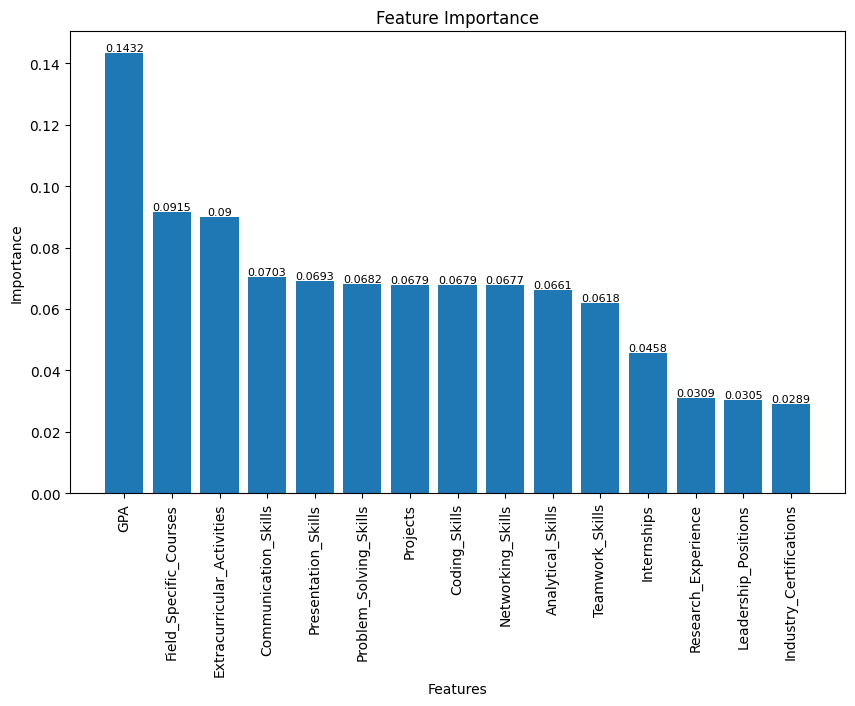

In [419]:
# Get the feature importance
randfor.fit(X_train, y_train)
feature_importances = randfor.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
bars = plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")

# Annotate each bar with the feature importance value
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=8)

plt.show()


In [420]:
# drop_features = ['Internships', 'Leadership_Positions', 'Research_Experience', 'Industry_Certifications']
# X_train, X_test = X_train.drop(columns=drop_features), X_test.drop(columns=drop_features)

#### RFE

In [421]:
# Import Library
from sklearn.feature_selection import RFE

In [480]:
rfe = RFE(estimator=randfor, n_features_to_select=4)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced'),
    n_features_to_select=4)

In [481]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['GPA', 'Extracurricular_Activities', 'Field_Specific_Courses',
       'Presentation_Skills'],
      dtype='object')

#### Top 4 Features

In [482]:
X_train_rf, X_test_rf = X_train[selected_features], X_test[selected_features]

In [483]:
randfor.fit(X_train_rf, y_train)

RandomForestClassifier(class_weight='balanced')

In [488]:
y_pred = randfor.predict(X_test_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05       130
           1       0.15      0.12      0.13       260
           2       0.20      0.22      0.21       343
           3       0.05      0.04      0.04       125
           4       0.08      0.08      0.08       129
           5       0.05      0.06      0.06       105
           6       0.14      0.14      0.14       236
           7       0.06      0.04      0.05       114
           8       0.20      0.23      0.21       358

    accuracy                           0.14      1800
   macro avg       0.11      0.11      0.11      1800
weighted avg       0.14      0.14      0.14      1800



#### Hyperparameter Tuning

In [489]:
from sklearn.model_selection import GridSearchCV

In [496]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

In [497]:
grid_search = GridSearchCV(
    estimator=randfor,
    param_grid=param_grid,
    scoring='f1_weighted',  
    cv=10,                
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='f1_weighted', verbose=2)

In [493]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [494]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weigthed Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best F1 Macro Score: 0.1483690350492209


In [495]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.14      0.02      0.04       130
           1       0.07      0.05      0.06       260
           2       0.19      0.34      0.25       343
           3       0.15      0.03      0.05       125
           4       0.10      0.03      0.05       129
           5       0.00      0.00      0.00       105
           6       0.13      0.14      0.13       236
           7       0.10      0.04      0.05       114
           8       0.19      0.33      0.24       358

    accuracy                           0.16      1800
   macro avg       0.12      0.11      0.10      1800
weighted avg       0.14      0.16      0.13      1800



In [505]:
# from imblearn.under_sampling import RandomUnderSampler

# ros = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train[selected_features], y_train)

In [ ]:
# randfor = RandomForestClassifier()
# randfor.fit(X_train_resampled, y_train_resampled)
# y_pred = randfor.predict(X_test[selected_features])

In [508]:
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.15      0.10       130
           1       0.17      0.14      0.15       260
           2       0.23      0.12      0.16       343
           3       0.06      0.10      0.08       125
           4       0.05      0.08      0.06       129
           5       0.06      0.10      0.07       105
           6       0.10      0.07      0.08       236
           7       0.05      0.09      0.07       114
           8       0.21      0.12      0.15       358

    accuracy                           0.11      1800
   macro avg       0.11      0.11      0.10      1800
weighted avg       0.14      0.11      0.12      1800



In [502]:
# randfor = RandomForestClassifier(class_weight='balanced')
# randfor.fit(X_train_resampled, y_train_resampled)
# y_pred = randfor.predict(X_test)

In [503]:
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.15      0.12       130
           1       0.12      0.10      0.11       260
           2       0.17      0.11      0.14       343
           3       0.06      0.08      0.07       125
           4       0.07      0.13      0.10       129
           5       0.05      0.10      0.07       105
           6       0.15      0.13      0.14       236
           7       0.07      0.11      0.08       114
           8       0.17      0.09      0.12       358

    accuracy                           0.11      1800
   macro avg       0.11      0.11      0.10      1800
weighted avg       0.13      0.11      0.11      1800



### Gradient Boost Machine